In [1]:
import pandas as pd
import nltk
import os
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.stem import PorterStemmer
st = PorterStemmer()

#### Data: https://archive.ics.uci.edu/ml/datasets/Health+News+in+Twitter

In [2]:
path = 'Health-Tweets'
text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
df = pd.DataFrame()
col_names = ['tw_id', 'date', 'tweet']
for f in text_files:
    
    df_sub = pd.read_csv(os.path.join(path, f), sep="|", names=col_names)
    df = pd.concat([df, df_sub])

In [3]:
df.head()

,tw_id,date,tweet
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...


In [4]:
df['processed_date'] = pd.to_datetime(df['date'])
df['day'] = df['processed_date'].dt.date

In [5]:
df.head()

,tw_id,date,tweet,processed_date,day
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,2015-04-09 01:31:50,2015-04-09
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,2015-04-08 23:30:18,2015-04-08
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,2015-04-08 23:30:18,2015-04-08
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,2015-04-08 18:05:28,2015-04-08
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,2015-04-08 13:19:33,2015-04-08


In [6]:
df['day'].value_counts().head(10)

2013-10-26    388
2014-12-04    276
2013-01-17    271
2015-01-08    258
2014-11-20    231
2014-12-18    229
2015-03-12    226
2014-10-24    225
2013-02-14    211
2014-12-02    208
Name: day, dtype: int64

In [7]:
# no. of words in a tweet, sorting it in descending order and see which tweet has the most number of words
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df.sort_values('word_count', ascending=False)[['tw_id', 'tweet', 'word_count']].head(20)

,tw_id,tweet,word_count
1631,507244293502013441,"I can't afford to buy it, but my need isn't an...",2449
5782,273184752255791104,I refuse to spend my life worrying about what ...,1451
2150,492379613793095680,"Before the visit, I had been split in two not ...",682
5540,334757575704846336,"It’s better not to drink and drive, but if you...",167
506,499533397300375552,We all wear a mask” @TerrieWilliams says about...,101
575,568520440244600833,[Babies are] doing little science experiments ...,67
2145,492430471280984064,I feel like they don’t want either of us aroun...,65
1600,507639022504529920,I can remember the early days of having schizo...,53
457,571804601713881088,Doctors underutilize [alternatives to hysterec...,53
734,477828064831737856,One blood donation can save up to 3 lives. Get...,46


#### to look up the tweet in the twitter the tweet id can be used
#### https://stackoverflow.com/questions/897107/can-i-fetch-the-tweet-from-twitter-if-i-know-the-tweets-id

In [8]:
#### no. of characters
df['char_count'] = df['tweet'].str.len()
df.sort_values('char_count', ascending=False)[['tw_id', 'tweet', 'char_count']].head(20)

,tw_id,tweet,char_count
1631,507244293502013441,"I can't afford to buy it, but my need isn't an...",22142
5782,273184752255791104,I refuse to spend my life worrying about what ...,12648
2150,492379613793095680,"Before the visit, I had been split in two not ...",5913
5540,334757575704846336,"It’s better not to drink and drive, but if you...",1436
506,499533397300375552,We all wear a mask” @TerrieWilliams says about...,914
575,568520440244600833,[Babies are] doing little science experiments ...,601
562,520584440032948224,RT @charlesornstein: .@SecBurwell acknowledged...,496
2145,492430471280984064,I feel like they don’t want either of us aroun...,465
744,501826404489515008,RT @raksingh: ICYMI Hospitals Reconsider Chari...,440
457,571804601713881088,Doctors underutilize [alternatives to hysterec...,423


In [9]:
# avg word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
df.sort_values('avg_word', ascending=False)[['tw_id', 'tweet', 'avg_word']].head(20)

,tw_id,tweet,avg_word
3374,434399025396465664,A doctor's view on alcoholism. http://well.blo...,34
562,520584440032948224,RT @charlesornstein: .@SecBurwell acknowledged...,34
98,579592727819460608,Should Canadian hospitals profit from foreign ...,32
1412,505006647165452288,Jaw implants recalled http://www.cbc.ca/news/h...,29
1118,462291349882945536,olololololololol: http://khne.ws/1nQFHTe http:...,28
753,524949022134784000,RT @SeniorsLaw: Is It Really Dementia? http://...,26
2371,537954968465330176,RT @IrishHospice: Very interesting article in ...,26
2148,456852530811920384,Pro-choice activists rally outside legislature...,25
1230,514420842579501056,39-year-old stroke victim becomes national spo...,25
1514,499951913446551552,Methadone alternative helping young patients h...,25


In [10]:
# checking how much tweets contain @ 
df['special_tags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df.sort_values('special_tags', ascending=False)[['tw_id', 'tweet', 'special_tags']].head(20)

,tw_id,tweet,special_tags
1631,507244293502013441,"I can't afford to buy it, but my need isn't an...",30
5782,273184752255791104,I refuse to spend my life worrying about what ...,17
2983,305040693246705665,#ff some of us: @PhilGalewitz @JordanRau @Mary...,10
3130,294854035008282624,#ff our reporters: @PhilGalewitz @JordanRau @M...,9
1176,448524525186338816,RT @CNNLiving: Join our #CNN10 hangout TODAY @...,8
40,575632926907371521,RT @milesobrien: Thanks to @drsanjaygupta @ron...,7
820,563497320873222144,RT @HHSGov: FRI @ 11 AM ET: Join @nih_nhlbi @U...,7
1281,552985765488373760,RT @angelahaupt: Just 30 min till the #USNTech...,7
1352,431791630749024256,RT @StarJonesEsq: Thanks to @cnn @NewDay @cnnh...,7
1592,297472654141702144,#FF #FollowFriday @happywivesclub @Dogspired @...,7


In [11]:
# checking how much tweets contain links
df['hrefs'] = df['tweet'].apply(lambda x: [x for x in x.split() if 'http' in x])
df.sort_values('hrefs', ascending=False)[['tw_id', 'tweet', 'hrefs']].head(20)

,tw_id,tweet,hrefs
575,568520440244600833,[Babies are] doing little science experiments ...,"[​http://ow.ly/Jks1i, http://nerd.me/1AoBN8z, ..."
4247,384816437753171968,What products can give you a youthful glow? Tr...,[young.http://nyti.ms/14YGyHq]
2434,536797910579437569,Basic model for how people access their health...,[years.http://gu.com/p/43d82/tw]
1620,411496833672699904,Miley Cyrus says sex goes kaput after 40. Sorr...,[wrong.http://cnn.it/1dblmPA]
4555,369559990735867904,RT @bstrauch: How close are we to printing org...,[world.http://nyti.ms/160PxUh]
4535,370198927137464321,RT @PerriKlass: Sending a child off to college...,[wise...http://well.blogs.nytimes.com/2013/08/...
27,573980153946181632,"A pill to burn calories? ""We are quite excited...",[we!http://lat.ms/1B9Gsg3]
1125,518052842465423361,RT @bstrauch: NBC cameraman gets Ebola in Libe...,[watch.http://nyti.ms/1rSYMWv]
6706,164112130025594881,Birth control for men? We're waiting...http://...,[waiting...http://bit.ly/y2khns]
4978,355058528408444931,RT @bstrauch: Could this incredibly cute robot...,[vaccine?http://nyti.ms/1a6tDUh]


In [12]:
# no. of numerics
df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['tweet','numerics']].sort_values('numerics', ascending=False).head(20)

,tweet,numerics
1631,"I can't afford to buy it, but my need isn't an...",156
5782,I refuse to spend my life worrying about what ...,97
2150,"Before the visit, I had been split in two not ...",41
5540,"It’s better not to drink and drive, but if you...",9
1047,PROGRESS: 13 of 41 vegetative patients had sig...,5
1210,Of 5 bills that would make it harder to skip v...,4
3927,25 Ways to Cut 500 Calories A Day: Do a couple...,4
1737,"WHOA! MRT @MyLastBite After 7 months of 10,000...",4
2098,"RT @jdwilson2: ""Choice is the enemy of weight ...",4
298,About 1 in 3 Americans has high blood pressure...,4


In [13]:
# no. of upper characters
df['upper'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['tweet','upper']].sort_values('upper', ascending=False).head(20)

,tweet,upper
1631,"I can't afford to buy it, but my need isn't an...",62
5782,I refuse to spend my life worrying about what ...,21
2150,"Before the visit, I had been split in two not ...",18
2555,RT @renelynch: Your #LATFit nickname: Planking...,11
3101,Today's #getfit tip @littleamberfate: DEAD LAS...,8
1488,RT @pharmalot: Pharmalot.. Pharmalittle.. Good...,8
1612,RT @marissaaevans: Need minority NHSC member w...,8
1636,RT @pharmalot: Pharmalot.. Pharmalittle.. Good...,8
413,RT @pharmalot: Pharmalot.. Pharmalittle.. Welc...,8
1811,RT @pharmalot: Pharmalot.. Pharmalittle.. Good...,8


In [14]:
def word_grams(words, n):
    s = []
    for ngram in ngrams(words, n):
        s.append(' '.join(str(i) for i in ngram))
    return s

In [15]:
# some preprocessing

def pre_processing(df_txt, txt_clm):
    
    processed_text = 'processed_text'
    # lower case 
    df_txt[txt_clm] = df_txt[txt_clm].str.lower()
    
    # remove punctuation
    df_txt[txt_clm] = df_txt[txt_clm].str.replace('[^\w\s]','')
    
    # remove stopwords
    df_txt[txt_clm] = df_txt[txt_clm].apply(lambda x: " ".join(x for x in x.split() if x not in ENGLISH_STOP_WORDS))
    
    # find unigrams, unigrams
    df_txt[processed_text] = df_txt[txt_clm].apply(lambda x: word_tokenize(x))
    df_txt["raw_text"] = df_txt[processed_text].apply(lambda x: " ".join(w for w in x))
    df_txt['unigrams'] = df_txt[processed_text].apply(lambda x: word_grams(x, 1))
    
    # find unigrams, bigrams
    df_txt['bigrams'] = df_txt[processed_text].apply(lambda x: word_grams(x, 2))
    
    return df_txt

print len(df)
df_txt = df[['tweet','upper']].sort_values('upper', ascending=False)
df_txt = pre_processing(df_txt, 'tweet')
df_txt

63028


,tweet,upper,processed_text,raw_text,unigrams,bigrams
1631,afford buy need isnt elses httpnytims1lzxosu i...,62,"[afford, buy, need, isnt, elses, httpnytims1lz...",afford buy need isnt elses httpnytims1lzxosu i...,"[afford, buy, need, isnt, elses, httpnytims1lz...","[afford buy, buy need, need isnt, isnt elses, ..."
5782,refuse spend life worrying eat pleasure worth ...,21,"[refuse, spend, life, worrying, eat, pleasure,...",refuse spend life worrying eat pleasure worth ...,"[refuse, spend, life, worrying, eat, pleasure,...","[refuse spend, spend life, life worrying, worr..."
2150,visit split fear death dread dying hospice tou...,18,"[visit, split, fear, death, dread, dying, hosp...",visit split fear death dread dying hospice tou...,"[visit, split, fear, death, dread, dying, hosp...","[visit split, split fear, fear death, death dr..."
2555,rt renelynch latfit nickname planking goddess ...,11,"[rt, renelynch, latfit, nickname, planking, go...",rt renelynch latfit nickname planking goddess ...,"[rt, renelynch, latfit, nickname, planking, go...","[rt renelynch, renelynch latfit, latfit nickna..."
3101,todays getfit tip littleamberfate dead greater...,8,"[todays, getfit, tip, littleamberfate, dead, g...",todays getfit tip littleamberfate dead greater...,"[todays, getfit, tip, littleamberfate, dead, g...","[todays getfit, getfit tip, tip littleamberfat..."
1488,rt pharmalot pharmalot pharmalittle good morni...,8,"[rt, pharmalot, pharmalot, pharmalittle, good,...",rt pharmalot pharmalot pharmalittle good morni...,"[rt, pharmalot, pharmalot, pharmalittle, good,...","[rt pharmalot, pharmalot pharmalot, pharmalot ..."
1612,rt marissaaevans need minority nhsc member ser...,8,"[rt, marissaaevans, need, minority, nhsc, memb...",rt marissaaevans need minority nhsc member ser...,"[rt, marissaaevans, need, minority, nhsc, memb...","[rt marissaaevans, marissaaevans need, need mi..."
1636,rt pharmalot pharmalot pharmalittle good morni...,8,"[rt, pharmalot, pharmalot, pharmalittle, good,...",rt pharmalot pharmalot pharmalittle good morni...,"[rt, pharmalot, pharmalot, pharmalittle, good,...","[rt pharmalot, pharmalot pharmalot, pharmalot ..."
413,rt pharmalot pharmalot pharmalittle welcome wo...,8,"[rt, pharmalot, pharmalot, pharmalittle, welco...",rt pharmalot pharmalot pharmalittle welcome wo...,"[rt, pharmalot, pharmalot, pharmalittle, welco...","[rt pharmalot, pharmalot pharmalot, pharmalot ..."
1811,rt pharmalot pharmalot pharmalittle good morni...,8,"[rt, pharmalot, pharmalot, pharmalittle, good,...",rt pharmalot pharmalot pharmalittle good morni...,"[rt, pharmalot, pharmalot, pharmalittle, good,...","[rt pharmalot, pharmalot pharmalot, pharmalot ..."


In [16]:
df['tweet'][:10]

0    Breast cancer risk test devised http://bbc.in/...
1    GP workload harming care - BMA poll http://bbc...
2    Short people's 'heart risk greater' http://bbc...
3    New approach against HIV 'promising' http://bb...
4    Coalition 'undermined NHS' - doctors http://bb...
5    Review of case against NHS manager http://bbc....
6    VIDEO: 'All day is empty, what am I going to d...
7    VIDEO: 'Overhaul needed' for end-of-life care ...
8    Care for dying 'needs overhaul' http://bbc.in/...
9    VIDEO: NHS: Labour and Tory key policies http:...
Name: tweet, dtype: object

In [17]:
df['tweet'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    breast cancer risk test devis http://bbc.in/1c...
1    GP workload harm care - bma poll http://bbc.in...
2    short people' 'heart risk greater' http://bbc....
3    new approach against hiv 'promising' http://bb...
4    coalit 'undermin nhs' - doctor http://bbc.in/1...
5    review of case against nh manag http://bbc.in/...
6    video: 'all day is empty, what am I go to do?'...
7    video: 'overhaul needed' for end-of-lif care h...
8    care for die 'need overhaul' http://bbc.in/1fd...
9    video: nhs: labour and tori key polici http://...
Name: tweet, dtype: object

#### stemming removes suffices like es, ing er, ed
1. policies - polici
2. going - go
3. manager - manag
4. devised - devis

Clusering

In [18]:
df_subset = df_txt.head(500)
cleaned_tweets = []
for tw in df_subset["raw_text"]:
    cleaned_tweets.append(tw)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidf_vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1, 2))  
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_tweets)  
feature_names = tfidf_vectorizer.get_feature_names() # num phrases 

In [20]:
from sklearn.cluster import KMeans
num_clusters = 5  
km = KMeans(n_clusters=num_clusters)  
km.fit(tfidf_matrix)  
clusters = km.labels_.tolist()  

In [21]:
df_subset['ClusterID'] = clusters  
print df_subset['ClusterID'].value_counts()

2    307
1     82
3     80
0     21
4     10
Name: ClusterID, dtype: int64


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])

Cluster 0 : Words :
 rd
 cynthiasass rd
 est
 page
 cynthiasass
 live chat
 fb page
 fb
 chat
 live
Cluster 1 : Words :
 pharmalot
 pharmalot pharmalot
 pharmalittle
 pharmalot pharmalittle
 rt pharmalot
 pharma
 good morning
 morning
 pharmalittle good
 good
Cluster 2 : Words :
 rt
 healthtalk
 amp
 nhs
 goodhealth
 et
 love
 cynthiasass goodhealth
 rt cynthiasass
 cynthiasass
Cluster 3 : Words :
 wsj
 rt
 http
 tomburtonwsj
 rt tomburtonwsj
 nhs
 va
 rt loftus
 loftus
 care
Cluster 4 : Words :
 questions labeled
 q1 q2
 labeled
 labeled q1
 a1 a2
 q2 healthtalk
 questions
 q1
 q2
 a2


In [23]:
# write tweets to a file to create a wordcloud
f = open('twts.txt','w')
s1 = '\n'.join(cleaned_tweets)
f.write(s1)
f.close()

In [24]:
from wordcloud import WordCloud
import os
from os import path
from collections import Counter

In [25]:
fo = open('twts.txt')
fo1 = fo.readlines()
freq_words = Counter()
for line in fo1:
    freq_words.update(line.split())

In [26]:
len(freq_words)

4581

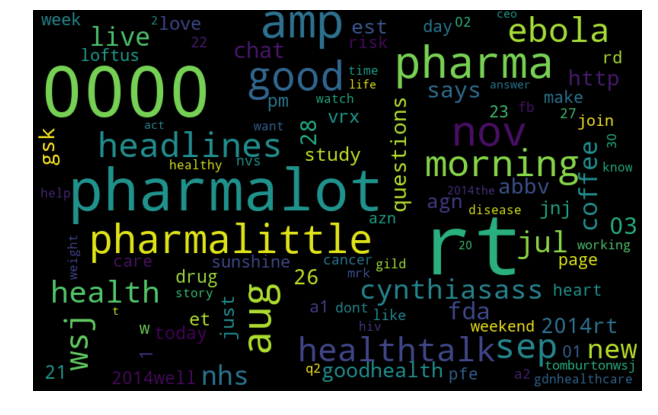

In [27]:
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=100, max_font_size=110)
wordcloud.generate_from_frequencies(freq_words)
# Display the generated image:
# the matplotlib way:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()